In [2]:
# yfinance：从 Yahoo Finance 下载历史股票数据
import yfinance as yf

# numpy：数值计算（数组运算、随机数生成等）
import numpy as np

# matplotlib.pyplot：用于绘图（折线图、直方图等）
import matplotlib.pyplot as plt

# scipy.stats.norm：正态分布工具（pdf、cdf、随机采样等）
from scipy.stats import norm

# seaborn：基于 matplotlib 的高级绘图与样式
import seaborn as sns

# pandas：DataFrame 与时间序列数据处理
import pandas as pd

# 设置 seaborn 绘图样式为暗色网格，图表更易阅读
sns.set_style('darkgrid')

In [3]:
# 从 Yahoo Finance 下载 AAPL 的历史价格数据（默认时间范围）
appl_stock_data = yf.download('AAPL')

/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/2499135748.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  appl_stock_data = yf.download('AAPL')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


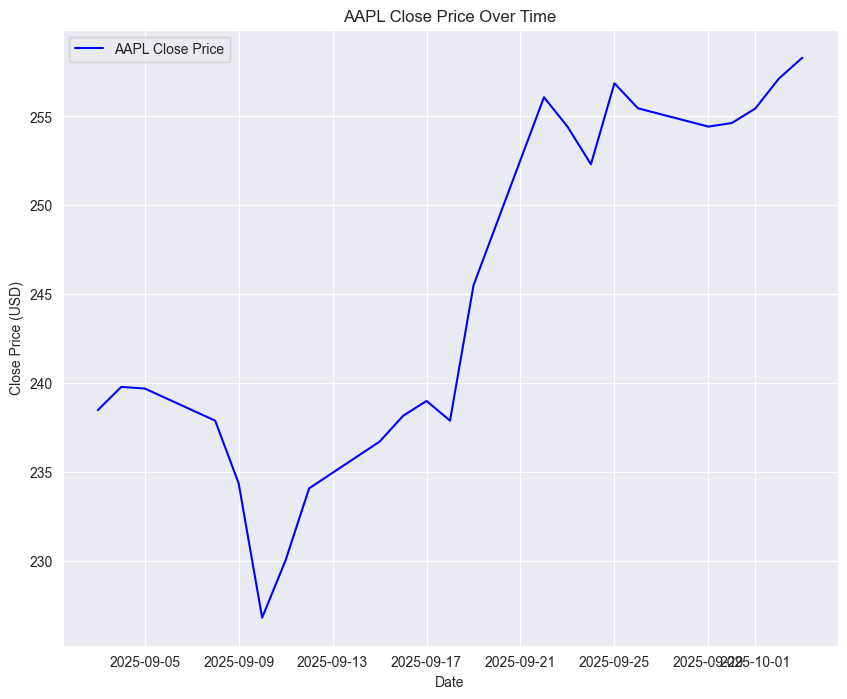

In [4]:
# 绘制 AAPL 收盘价的时间序列图

plt.figure(figsize = (10,8))

plt.plot(appl_stock_data['Close'], label = 'AAPL Close Price', color = 'blue')
# 在 notebook 中显示这个序列（Jupyter 会显示最后一个表达式的值）
appl_stock_data['Close']

plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [6]:
# 定义我们关心的股票代码列表，并下载从 2020-01-01 起的历史数据
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']

# 按 ticker 分组下载（可选），这里也演示不分组的下载方式
stock_data = yf.download(tickers, start = '2020-01-01', group_by = 'ticker')

# 另一种下载形式（多层列或单层列取决于 download 的参数）
stock_data = yf.download(tickers, start = '2020-01-01')

# 删除缺失数据，避免后续计算出错
stock_data = stock_data.dropna()

/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/1225347273.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start = '2020-01-01', group_by = 'ticker')
[*********************100%***********************]  5 of 5 completed
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/1225347273.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start = '2020-01-01')

/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/1225347273.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start = '2020-01-01')
[*********************100%***********************]  5 of 5 completed



In [7]:
# 查看 AAPL 的 Close 列（用于检查数据结构）
stock_data['Close', 'AAPL']

Date
2020-01-02     72.538513
2020-01-03     71.833282
2020-01-06     72.405670
2020-01-07     72.065147
2020-01-08     73.224411
                 ...    
2025-09-26    255.460007
2025-09-29    254.429993
2025-09-30    254.630005
2025-10-01    255.449997
2025-10-02    257.130005
Name: (Close, AAPL), Length: 1446, dtype: float64

In [8]:
# 计算股票的每日收益率（pct_change 返回日变动比例），加 1 表示每日收益的乘数因子
stock_data['Close','AMZN'].pct_change()+1

Date
2020-01-02         NaN
2020-01-03    0.987861
2020-01-06    1.014886
2020-01-07    1.002092
2020-01-08    0.992191
                ...   
2025-09-26    1.007472
2025-09-29    1.010875
2025-09-30    0.988297
2025-10-01    1.004828
2025-10-02    1.008068
Name: (Close, AMZN), Length: 1446, dtype: float64

In [ ]:
# 计算 AMZN 的累积收益（以起始日价格为基准，起始值为 1）
stock_data['Close','AMZN']/stock_data['Close','AMZN'][0]

/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_17084/496735981.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data['Close','AMZN']/stock_data['Close','AMZN'][0]


Date
2020-01-02    1.000000
2020-01-03    0.987861
2020-01-06    1.002566
2020-01-07    1.004663
2020-01-08    0.996818
                ...   
2025-09-25    2.298723
2025-09-26    2.315899
2025-09-29    2.341084
2025-09-30    2.313687
2025-10-01    2.324856
Name: (Close, AMZN), Length: 1445, dtype: float64

In [9]:
# 为每个 ticker 添加每日收益（乘数）和累积收益列，方便后续绘图与组合计算
for ticker in tickers:
    stock_data[('return', ticker)] = stock_data['Close', ticker].pct_change()+1
    stock_data[('cum_return', ticker)] = stock_data['Close', ticker]/stock_data['Close', ticker][0]
    

/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/239322819.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data[('cum_return', ticker)] = stock_data['Close', ticker]/stock_data['Close', ticker][0]
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/239322819.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data[('cum_return', ticker)] = stock_data['Close', ticker]/stock_data['Close', ticker][0]
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_22990/239322819.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

In [10]:
# 显示处理好的 stock_data（DataFrame），用于检查新增列与数据完整性
stock_data

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2020-01-02   72.538513   94.900497   67.965233  152.791092   28.684000   
2020-01-03   71.833282   93.748497   67.609688  150.888641   29.534000   
2020-01-06   72.405670   95.143997   69.411766  151.278610   30.102667   
2020-01-07   72.065147   95.343002   69.277679  149.899292   31.270666   
2020-01-08   73.224411   94.598503   69.770782  152.286957   32.809334   
...                ...         ...         ...         ...         ...   
2025-09-26  255.460007  219.779999  246.539993  511.459991  440.399994   
2025-09-29  254.429993  222.169998  244.050003  514.599976  443.209991   
2025-09-30  254.630005  219.570007  243.100006  517.950012  444.720001   
2025-10-01  255.449997  220.630005  244.899994  519.710022  459.459991   
2025-10-02  257.130005  222.410004  245.690002  515.739990  436.000000   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2020-01-02   72.598892   94.900497   67.965233  152.895731   28.713333  ...   
2020-01-03   72.594048   94.309998   68.217003  152.153817   30.266666  ...   
2020-01-06   72.444313   95.184502   69.437089  151.345205   30.104000  ...   
2020-01-07   72.671341   95.694504   69.694308  151.887418   31.441999  ...   
2020-01-08   73.526303   95.550003   70.108950  152.962357   33.232666  ...   
...                ...         ...         ...         ...         ...  ...   
2025-09-26  257.600006  221.050003  249.419998  513.940002  440.470001  ...   
2025-09-29  255.000000  222.600006  251.149994  516.849976  450.980011  ...   
2025-09-30  255.919998  222.240005  243.289993  518.159973  445.000000  ...   
2025-10-01  258.790009  222.149994  246.300003  520.510010  462.290009  ...   
2025-10-02  258.179993  222.809998  246.809998  521.599976  470.750000  ...   

Price         return cum_return    return cum_return    return cum_return  \
Ticker          AAPL       AAPL      MSFT       MSFT      AMZN       AMZN   
Date                                                                        
2020-01-02       NaN   1.000000       NaN   1.000000       NaN   1.000000   
2020-01-03  0.990278   0.990278  0.987549   0.987549  0.987861   0.987861   
2020-01-06  1.007968   0.998169  1.002584   0.990101  1.014886   1.002566   
2020-01-07  0.995297   0.993474  0.990882   0.981074  1.002092   1.004663   
2020-01-08  1.016086   1.009456  1.015928   0.996700  0.992191   0.996818   
...              ...        ...       ...        ...       ...        ...   
2025-09-26  0.994511   3.521716  1.008737   3.347446  1.007472   2.315899   
2025-09-29  0.995968   3.507516  1.006139   3.367997  1.010875   2.341084   
2025-09-30  1.000786   3.510273  1.006510   3.389923  0.988297   2.313687   
2025-10-01  1.003220   3.521578  1.003398   3.401442  1.004828   2.324856   
2025-10-02  1.006577   3.544738  0.992361   3.375459  1.008068   2.343613   

Price         return cum_return    return cum_return  
Ticker         GOOGL      GOOGL      TSLA       TSLA  
Date                                                  
2020-01-02       NaN   1.000000       NaN   1.000000  
2020-01-03  0.994769   0.994769  1.029633   1.029633  
2020-01-06  1.026654   1.021283  1.019255   1.049458  
2020-01-07  0.998068   1.019311  1.038801   1.090178  
2020-01-08  1.007118   1.026566  1.049205   1.143820  
...              ...        ...       ...        ...  
2025-09-26  1.003051   3.627443  1.040176  15.353507  
2025-09-29  0.989900   3.590807  1.006381  15.451471  
2025-09-30  0.996107   3.576829  1.003407  15.504114  
2025-10-01  1.007404   3.603313  1.033144  16.017989  
2025-10-02  1.003226   3.614937  0.948940  15.200112  

[1446 

This is where we put so many money into the interval to see how much it growth

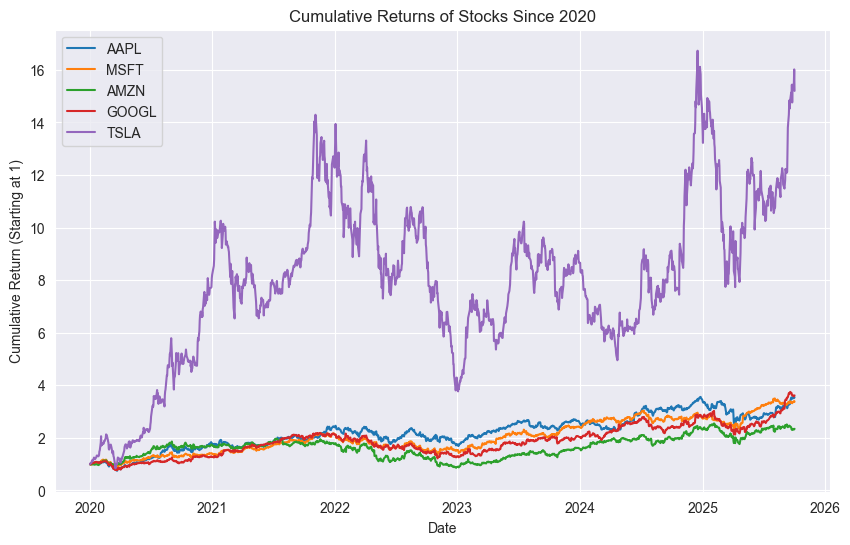

In [11]:
# 绘制自 2020 年以来各支股票的累积收益曲线
plt.figure(figsize = (10,6))

for ticker in tickers:
    plt.plot(stock_data.index, stock_data[('cum_return', ticker)], label = ticker)

plt.title('Cumulative Returns of Stocks Since 2020')
plt.xlabel('Date')  
plt.ylabel('Cumulative Return (Starting at 1)')
plt.legend()
plt.show()  

In [ ]:
# 可视化一个等权重投资组合：假设在每只股票上等额投资
# 计算每只股票在每日的投资回报（乘数形式），然后求加权和作为组合的每日回报
weight = 1/len(tickers)

portfolio_returns = sum(weight*stock_data['return', ticker] for ticker in tickers)   

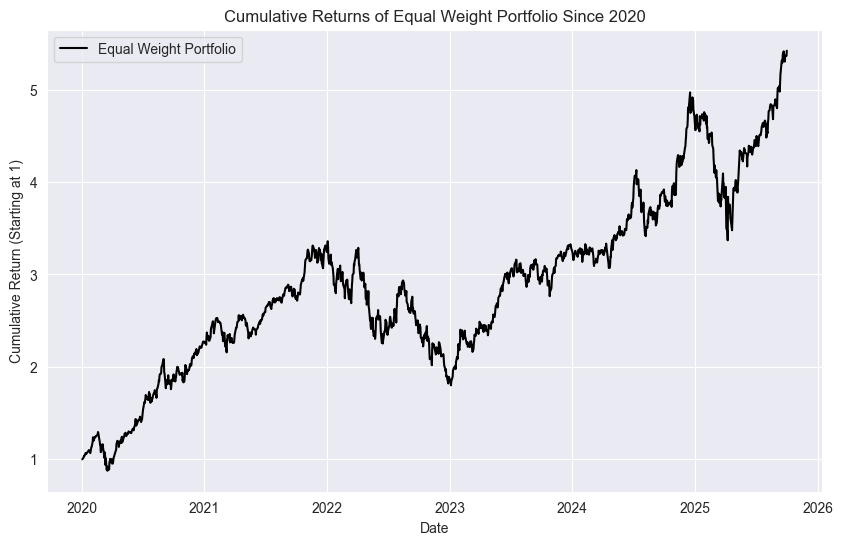

In [ ]:
# 绘制等权组合的累积收益（cumprod 将每日乘数因子累乘）
plt.figure(figsize = (10,6))

plt.plot(stock_data.index, portfolio_returns.cumprod(), label = 'Equal Weight Portfolio', color = 'black')     
plt.title('Cumulative Returns of Equal Weight Portfolio Since 2020')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Starting at 1)')
plt.legend()
plt.show()

Measuring volatility:


Assumptions:

Time is measured in years.

There are 252 trading days per year.

Definition: Volatility of a stock over an interval of time is the (yearly) standard deviation of the log-returns of the stock.

In [ ]:
# 计算 AAPL 的年化波动率：先取每日收益的对数，再计算标准差并年化（乘以 sqrt(252)）
np.std(np.log(stock_data['return', 'AAPL']))*np.sqrt(252) #volatility of AAPL

np.float64(0.3220997829636963)

In [ ]:
# 为每只股票计算年化波动率并存入字典
stock_volatilities = {}

for ticker in tickers:
    stock_volatilities[ticker] = np.std(np.log(stock_data['return', ticker]))*np.sqrt(252)

In [ ]:
# 显示计算得到的每只股票年化波动率（字典形式）
stock_volatilities

{'AAPL': np.float64(0.3220997829636963),
 'MSFT': np.float64(0.29901575687770365),
 'AMZN': np.float64(0.35799613192798474),
 'GOOGL': np.float64(0.3256653334652896),
 'TSLA': np.float64(0.670716054995391)}

In [ ]:
# 计算组合的每日收益与对数收益，然后计算组合年化波动率
portfolio_daily_returns = portfolio_returns.pct_change()+1
portfolio_daily_log_returns = np.log(portfolio_daily_returns)

portfolio_volatility = np.std(portfolio_daily_log_returns)*np.sqrt(252)

In [ ]:
# 显示组合波动率（变量名可能需与之前一致）
portfolio_vol

np.float64(0.4692303728977814)

### Random Walks


- Up-factor: $u > 0$

- Down-factor: $d < 0$

- Probability $p$: $0<p<1$


The $n$-step random walk is $$w_n = z_1 + z_2 +\cdots + z_n$$ where $z_i$ is the $2$-element distriubtion with range $\{u , d \}$ and $P(z_i = u) = p$ and $P(z_i = d) = 1-p$.

The random variables $z_1,z_2,\ldots,z_n$ are independent.


In [ ]:
# 示例：从 {2, -3} 的离散分布中以给定概率抽样，构造步长序列
np.random.choice([2, -3], p = [2/3, 1/3], size = 10)

array([ 2,  2,  2, -3, -3, -3, -3,  2, -3,  2])

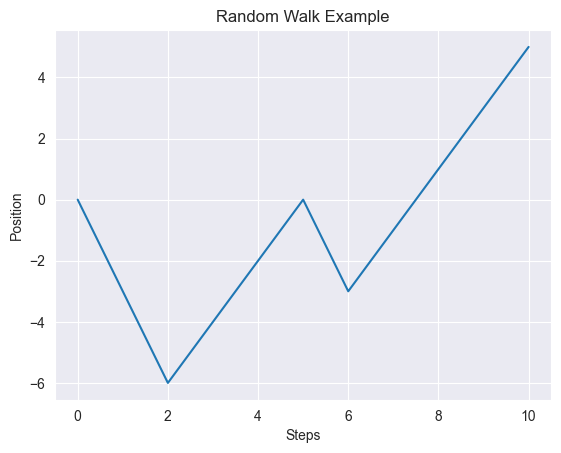

In [ ]:
# 生成并绘制一个离散随机游走示例
random_walk = np.cumsum(np.random.choice([2,-3], p = [2/3,1/3], size = 10))

random_walk = np.insert(random_walk, 0, 0)

plt.plot(random_walk)
plt.title('Random Walk Example')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.show()

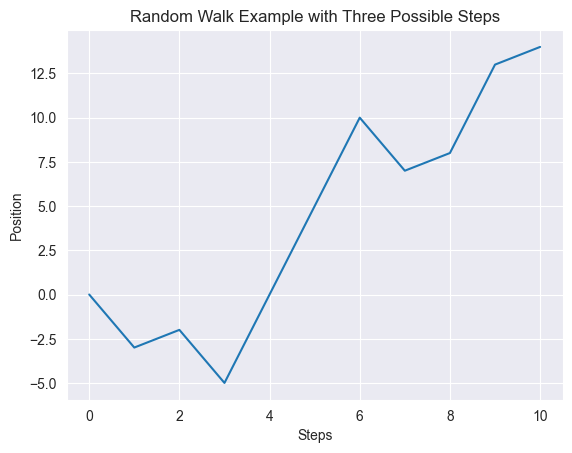

In [ ]:
# 三值步长的随机游走示例并绘图
random_walk = np.cumsum(np.random.choice([-3,1,5], p = [1/3, 1/3, 1/3], size = 10))   
random_walk = np.insert(random_walk, 0, 0)

plt.plot(random_walk)
plt.title('Random Walk Example with Three Possible Steps')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.show()  

Symmetric Random Walk

$u = 1$

$d = -1$

$p = 1/2$

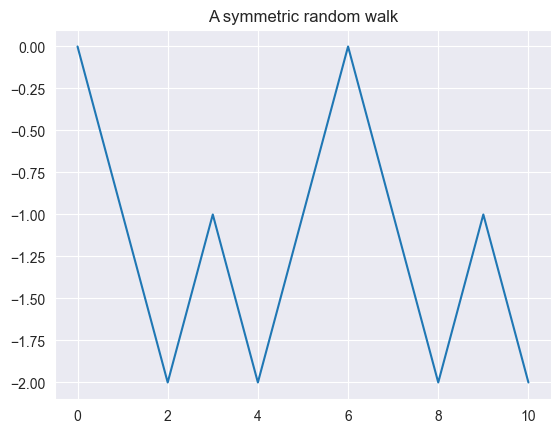

In [ ]:
# 对称随机游走示例（步长为 +1 或 -1，等概率）
random_walk = np.cumsum(np.random.choice([1,-1], p = [1/2, 1/2], size = 10))

random_walk = np.insert(random_walk, 0, 0)

plt.plot(random_walk)
plt.title('A symmetric random walk')
plt.show()

$M_n$ denotes symmetric random walk with $n$-steps.

$E[M_n] = 0$

$Var(M_n) = n$

$std(M_n) = \sqrt{n}$

$\lim_{n\to\infty} \frac{M_n}{\sqrt{n}} = \mathcal{N}(0,1)$.